# Explore Restaurant Locations in Frankfurt am Main - Germany

This project explores the neighbourhoods of Frankfurt to find a beneficial location to open a new Vegetarian / Vegan Restaurant in the Frankfurt city area. 

## Table of contents
1. [Scrape Information on neighborhoods in Frankfurt](#section1)
2. [Display Neighborhoods on Map](#section2)
3. [Extract Venues for Neighborhhods](#section3)
4. [Analyze Vegetarian / Vegan Restaurants](#section4)
5. [Analyse Neighborhoods of Top Two Vegetarian Restaurants](#section5)
6. [Cluster Analysis of Neighborhoods in Frankfurt](#section6)
7. [Propse a new Location for Opening a Vegetarian Restaurant](#section7)



## 1 Scrape Information on Neighourhoods in Frankfurt am Main <a name="section1"></a>

Scrape the website (link displayed below) to obtain information on the names of neighbourhoods in Frankfurt, their postal codes and latitude, longitude coordinates. 

https://www.suche-postleitzahl.org/frankfurt-plz-60306-65936.40d9


Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

Use the Beautiful Soup Library to scrape information on neighbourhood names, postal codes, latitude and longitude coordinates from website. 

In [2]:
source = requests.get('https://www.suche-postleitzahl.org/frankfurt-plz-60306-65936.40d9').text
soup = BeautifulSoup(source, 'html5lib')

In [3]:
table_rows = soup.find_all('tbody')[1].find_all('tr')
neighbourhoods = []
postalcodes = []
lat_cor = []
long_cor = []
counter = 0


for row in table_rows:
    table_cells = row.find_all('td')
    lat_cor.append(float(table_cells[0].get('data-lat')))
    long_cor.append(float(table_cells[0].get('data-lon')))
    cols=[x.text.strip() for x in table_cells]
    print(cols)
    neighbourhoods.append(cols[0])
    postalcodes.append(cols[1])
    
    
    
    

['Altstadt', '60311, 60313']
['Bahnhofsviertel', '60329']
['Bergen-Enkheim', '60388, 60389']
['Berkersheim', '60435']
['Bockenheim', '60325, 60431, 60486, 60487']
['Bonames', '60433, 60437']
['Bornheim', '60385, 60386, 60389, 60435']
['Dornbusch', '60320, 60322, 60431, 60433, 60435']
['Eckenheim', '60320, 60435']
['Eschersheim', '60431, 60433']
['Fechenheim', '60314, 60386']
['Flughafen', '60549']
['Frankfurter Berg', '60433']
['Gallus', '60325, 60326, 60327, 60329, 60486']
['Ginnheim', '60431']
['Griesheim', '60326, 65933']
['Gutleutviertel', '60327, 60329']
['Harheim', '60437']
['Hausen', '60487, 60488']
['Heddernheim', '60439']
['Höchst', '65929, 65934']
['Innenstadt', '60310, 60311, 60313, 60318, 60322, 60329']
['Kalbach-Riedberg', '60437, 60438, 60439']
['Nied', '65934, 65936']
['Nieder-Erlenbach', '60437']
['Nieder-Eschbach', '60437']
['Niederrad', '60528']
['Niederursel', '60437, 60439']
['Nordend-Ost', '60316, 60318, 60385, 60389']
['Nordend-West', '60316, 60318, 60320, 60322, 

Display the total number of neighbourhoods retrieved from the website

In [4]:
len(neighbourhoods)


46

Save the information obtained from the website in a dataframe and display it

In [5]:
d = {'neighbourhoods': neighbourhoods, 'postalcodes': postalcodes, 'latitude': lat_cor, 'longitude': long_cor}
frankfurt_df = pd.DataFrame(data=d)

In [17]:
# display first ten rows of the dataframe
frankfurt_df.head(10)

,neighbourhoods,postalcodes,latitude,longitude
0,Altstadt,"60311, 60313",50.111579,8.684542
1,Bahnhofsviertel,60329,50.107940,8.670305
2,Bergen-Enkheim,"60388, 60389",50.155105,8.752649
3,Berkersheim,60435,50.172748,8.697739
4,Bockenheim,"60325, 60431, 60486, 60487",50.121240,8.641610
5,Bonames,"60433, 60437",50.183384,8.664951
6,Bornheim,"60385, 60386, 60389, 60435",50.130865,8.708913
7,Dornbusch,"60320, 60322, 60431, 60433, 60435",50.145323,8.668009
8,Eckenheim,"60320, 60435",50.149393,8.680750
9,Eschersheim,"60431, 60433",50.157023,8.656325


## 2 Display the neighbourhoods of Frankfurt on a Map <a name="section2"></a>

In [7]:
# get coordinates for Frankfurt am Main, Germany in case geolocator service is not available
latitude = 50.1106444
longitude = 8.6820917

In [8]:
# get the coordinates for Frankfurt am Main, Germany with the geolocator

address = 'Frankfurt am Main, Germany'

geolocator = Nominatim(user_agent="fra_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Frankfurt am Main are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Frankfurt am Main are 50.1106444, 8.6820917.


Create a map of Frankfurt am Main and display the neighbouroods as blue markers on top

In [9]:
# create map of Frankfurt am Main using latitude and longitude values
map_fra = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, postalcode, neighborhood in zip(frankfurt_df['latitude'], frankfurt_df['longitude'], frankfurt_df['neighbourhoods'], frankfurt_df['postalcodes']):
    label = '{}, {}'.format(neighborhood, postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fra)  
    
map_fra

## 3 Extract Venues for each Neighbourhood <a name="section3"></a>

Set up the foursquare credentials

In [1]:
CLIENT_ID = 'XXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
# function that gets venues based on the center coordinates and a defined radius and returns dataframe with information on nearby venues. 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'VenueID',    
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


Extract up to 100 venues for each neighbourhood and save venue information in a dataframe 'frankfurt_venues'

In [14]:
# call the function to extract venues for each neighbourhood
limit = 100
frankfurt_venues = getNearbyVenues(names=frankfurt_df['neighbourhoods'],
                                   latitudes=frankfurt_df['latitude'],
                                   longitudes=frankfurt_df['longitude']
                                  )

Altstadt
Bahnhofsviertel
Bergen-Enkheim
Berkersheim
Bockenheim
Bonames
Bornheim
Dornbusch
Eckenheim
Eschersheim
Fechenheim
Flughafen
Frankfurter Berg
Gallus
Ginnheim
Griesheim
Gutleutviertel
Harheim
Hausen
Heddernheim
Höchst
Innenstadt
Kalbach-Riedberg
Nied
Nieder-Erlenbach
Nieder-Eschbach
Niederrad
Niederursel
Nordend-Ost
Nordend-West
Oberrad
Ostend
Praunheim
Preungesheim
Riederwald
Rödelheim
Sachsenhausen-Nord
Sachsenhausen-Süd
Schwanheim
Seckbach
Sindlingen
Sossenheim
Unterliederbach
Westend-Nord
Westend-Süd
Zeilsheim


Print the size of the resulting dataframe. Number of rows are equal to the total number of venues retrieved in Frankfurt neighbourhoods. 

In [18]:
print(frankfurt_venues.shape)
# display first 5 rows of dataframe with venues
frankfurt_venues.head()

(885, 8)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt,50.111579,8.684542,Kleinmarkthalle,4b058852f964a520bfbe22e3,50.112778,8.682958,Market
1,Altstadt,50.111579,8.684542,Weinterasse Rollanderhof,4dc97e9cd4c0abe9b63152f9,50.112473,8.682164,Wine Bar
2,Altstadt,50.111579,8.684542,Römerberg,4c836113d6ebbfb7c04551a4,50.110489,8.682131,Plaza
3,Altstadt,50.111579,8.684542,SCHIRN Kunsthalle,4b058850f964a52024be22e3,50.110291,8.683542,Art Museum
4,Altstadt,50.111579,8.684542,Dom Aussichtsplattform,50c33ac2e4b070f4c1fd9325,50.110609,8.684908,Scenic Lookout


Display the total number of venues retrieved per neighbourhood

In [19]:
df_venue_counts = frankfurt_venues.groupby('Neighbourhood').count()
df_venue_counts

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Altstadt,100,100,100,100,100,100,100
Bahnhofsviertel,100,100,100,100,100,100,100
Bergen-Enkheim,8,8,8,8,8,8,8
Berkersheim,4,4,4,4,4,4,4
Bockenheim,47,47,47,47,47,47,47
Bonames,8,8,8,8,8,8,8
Bornheim,38,38,38,38,38,38,38
Dornbusch,5,5,5,5,5,5,5
Eckenheim,13,13,13,13,13,13,13


Text(0.5, 0, 'Number of Extracted Venues')

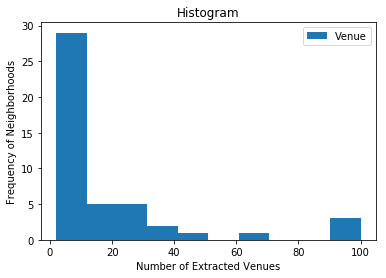

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_venue_counts_p = df_venue_counts[['Venue']]
df_venue_counts_p
df_venue_counts_p.plot(kind='hist')

plt.title('Histogram')
plt.ylabel('Frequency of Neighborhoods')
plt.xlabel('Number of Extracted Venues')

The minimum number of venues extracted for a neighbourhood is 2 and the maximum number is the predefined limit of 100 venues. 
I am excluding neighbourhoods with less than 4 venues extracted from further analysis. 
The only neighbourhood with less than 4 venues is Fechenheim.
Delete all the rows in which venues of Fechenheim are listed: 

In [22]:
# Get the index of all rows in which venues of Fenchenheim are listed
indexName = frankfurt_venues[ frankfurt_venues['Neighbourhood'] == 'Fechenheim' ].index

# Delete these rows
frankfurt_venues.drop(indexName, inplace = True)
df_counts = frankfurt_venues.groupby('Neighbourhood').count()

# Display dataframe and verify that Fechenheim was dropped 
df_counts

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Altstadt,100,100,100,100,100,100,100
Bahnhofsviertel,100,100,100,100,100,100,100
Bergen-Enkheim,8,8,8,8,8,8,8
Berkersheim,4,4,4,4,4,4,4
Bockenheim,47,47,47,47,47,47,47
Bonames,8,8,8,8,8,8,8
Bornheim,38,38,38,38,38,38,38
Dornbusch,5,5,5,5,5,5,5
Eckenheim,13,13,13,13,13,13,13


print the number of unique categories of venues retrieved for all neighourhoods in Frankfurt

In [23]:
print('There are {} uniques categories.'.format(len(frankfurt_venues['Venue Category'].unique())))

There are 172 uniques categories.


Transform dataframe for further processing

In [24]:
# one hot encoding
frankfurt_onehot = pd.get_dummies(frankfurt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
frankfurt_onehot['Neighbourhood'] = frankfurt_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [frankfurt_onehot.columns[-1]] + list(frankfurt_onehot.columns[:-1])
frankfurt_onehot = frankfurt_onehot[fixed_columns]

frankfurt_onehot.head()

,Neighbourhood,Accessories Store,African Restaurant,Airport Lounge,Apple Wine Pub,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Track,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar
0,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Altstadt,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
frankfurt_onehot.shape

(883, 173)

In [26]:
frankfurt_grouped = frankfurt_onehot.groupby('Neighbourhood').sum().reset_index()
frankfurt_grouped.head()

,Neighbourhood,Accessories Store,African Restaurant,Airport Lounge,Apple Wine Pub,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Track,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar
0,Altstadt,0,0,0,0,3,0,0,0,1,...,0,0,0,0,1,1,1,1,0,3
1,Bahnhofsviertel,0,1,0,0,1,0,3,0,0,...,0,0,1,0,1,1,3,1,1,0
2,Bergen-Enkheim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berkersheim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bockenheim,0,0,0,0,0,1,4,0,0,...,0,0,0,0,2,0,1,0,0,2


## 4 Display and Analyze Vegetarian / Vegan Restaurants in Frankfurt <a name="section4"></a>

Display all the Vegetarian / Vegan Restaurants that were retrieved in the neighbourhoods of Frankfurt.  

In [27]:
frankfurt_grouped.loc[frankfurt_grouped['Vegetarian / Vegan Restaurant'] == 1]

,Neighbourhood,Accessories Store,African Restaurant,Airport Lounge,Apple Wine Pub,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Track,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar
0,Altstadt,0,0,0,0,3,0,0,0,1,...,0,0,0,0,1,1,1,1,0,3
1,Bahnhofsviertel,0,1,0,0,1,0,3,0,0,...,0,0,1,0,1,1,3,1,1,0
34,Rödelheim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


A total of three vegetarian restaurants were retrieved. These are located in the neighbourhoods 'Altstadt', 'Bahnhofsviertel', 'Rödelheim'. 

Save the retrieved vegetarian restaurants to a dataframe for further analysis. 

In [28]:
# get details on the vegetarian restaurants in Frankfurt 
vegRestos = frankfurt_venues.loc[frankfurt_venues['Venue Category']=='Vegetarian / Vegan Restaurant']
vegRestos_df = pd.DataFrame(vegRestos)
vegRestos

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Category
33,Altstadt,50.111579,8.684542,Seven Swans & The Tiny Cup,54eb9315498e8927a1453286,50.109534,8.686896,Vegetarian / Vegan Restaurant
172,Bahnhofsviertel,50.107940,8.670305,vevay,552b9903498e28d039750db6,50.109036,8.675099,Vegetarian / Vegan Restaurant
752,Rödelheim,50.123646,8.606308,Savory,50b0e3b8e4b0b42d0f39502b,50.125230,8.612293,Vegetarian / Vegan Restaurant


Define a method to extract details on a specific venue based on the venue id. The details are returned in form of a dataframe and include:

number of likes: the number of users who indicated to 'like" the venue
rating: a rating score ranging from 0 (least possible score) to 10 (maximum score). The higher the rating score, the better the venue is rated by users
price: the price tier of the venue in form of a string message. 1 is least pricy and 4 most pricy



In [29]:
def getVenueDetails(neighbourhoods, names, vIds, latitudes, longitudes, categories):
    
    venues_details_list=[]
    for  nhood, name, venue_id,  lat, lng, cat in zip(neighbourhoods, names, vIds,  latitudes, longitudes, categories):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

        
            
        # make the GET request
        results = requests.get(url).json()
        
        
        # return only relevant information 
        venues_details_list.append([(
            nhood,
            name,
            venue_id,
            lat, 
            lng,
            cat, 
            results['response']['venue']['likes']['count'], 
            results['response']['venue']['rating'], 
            results['response']['venue']['price']['message'])])  
             

    details_venues = pd.DataFrame([item for venue_details_list in venues_details_list for item in venue_details_list])
    details_venues.columns = ['Neighbourhood',
                  'Venue Name',
                  'Venue ID', 
                  'Venue  Latitude', 
                  'Venue  Longitude', 
                  'Venue Category', 
                  'Venue Likes',
                  'Venue Rating', 
                  'Venue Price']
    
    return(details_venues)


In [30]:
# Extract user ratings and likes for the vegetarian / vegan restaurants retrieved in Frankfurt 

frankfurt_vegRestos = getVenueDetails(neighbourhoods=vegRestos['Neighbourhood'], 
                                   names=vegRestos['Venue'],
                                   vIds=vegRestos['VenueID'],
                                   latitudes=vegRestos['Venue Latitude'],
                                   longitudes=vegRestos['Venue Longitude'],
                                   categories=vegRestos['Venue Category'])
                                  



Seven Swans & The Tiny Cup
vevay
Savory


In [31]:
# display the dataframe with the venue details on user rating, number of likes on the vegetarian restaurants

frankfurt_vegRestos

,Neighbourhood,Venue Name,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Venue Likes,Venue Rating,Venue Price
0,Altstadt,Seven Swans & The Tiny Cup,54eb9315498e8927a1453286,50.109534,8.686896,Vegetarian / Vegan Restaurant,39,7.9,Moderate
1,Bahnhofsviertel,vevay,552b9903498e28d039750db6,50.109036,8.675099,Vegetarian / Vegan Restaurant,43,7.4,Moderate
2,Rödelheim,Savory,50b0e3b8e4b0b42d0f39502b,50.125230,8.612293,Vegetarian / Vegan Restaurant,33,8.1,Moderate


Get the locations of health food stores in Frankfurt am Main. 

In [32]:
# get the locations and number of health food stores in Frankfurt 
health_foodstore = frankfurt_venues.loc[frankfurt_venues['Venue Category']=='Health Food Store']
healthFoodStore_df = pd.DataFrame(health_foodstore)
healthFoodStore_df

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Category
694,Nordend-West,50.129348,8.683931,Basic,4ba33e65f964a5206e3138e3,50.128102,8.684600,Health Food Store
700,Nordend-West,50.129348,8.683931,Reformhaus Achim Andersch,4c1bb420b9f876b020af7a46,50.126333,8.684291,Health Food Store


In [33]:
# sort the retrieved vegetarian / vegan restaurants based on the user ratings in descending order

frankfurt_vegRestos.sort_values(by=['Venue Rating'], ascending=False)

,Neighbourhood,Venue Name,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Venue Likes,Venue Rating,Venue Price
2,Rödelheim,Savory,50b0e3b8e4b0b42d0f39502b,50.125230,8.612293,Vegetarian / Vegan Restaurant,33,8.1,Moderate
0,Altstadt,Seven Swans & The Tiny Cup,54eb9315498e8927a1453286,50.109534,8.686896,Vegetarian / Vegan Restaurant,39,7.9,Moderate
1,Bahnhofsviertel,vevay,552b9903498e28d039750db6,50.109036,8.675099,Vegetarian / Vegan Restaurant,43,7.4,Moderate


## 4 Extract the most common venue categories for each neighbourhood

The current analysis only extracts the top 4 most common venue categories per neighbourhood. This is due to the fact, that for several neighbourhoos in Frankfurt only 4 venues in total could be retrieved by the Foursquare API. 

In [34]:
# calculate the mean frequency of each venue category
frankfurt_grouped_f = frankfurt_onehot.groupby('Neighbourhood').mean().reset_index()
frankfurt_grouped_f.head()

,Neighbourhood,Accessories Store,African Restaurant,Airport Lounge,Apple Wine Pub,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Track,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar
0,Altstadt,0.0,0.00,0.0,0.0,0.03,0.000000,0.000000,0.0,0.01,...,0.0,0.0,0.00,0.0,0.010000,0.01,0.010000,0.01,0.00,0.030000
1,Bahnhofsviertel,0.0,0.01,0.0,0.0,0.01,0.000000,0.030000,0.0,0.00,...,0.0,0.0,0.01,0.0,0.010000,0.01,0.030000,0.01,0.01,0.000000
2,Bergen-Enkheim,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000
3,Berkersheim,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000
4,Bockenheim,0.0,0.00,0.0,0.0,0.00,0.021277,0.085106,0.0,0.00,...,0.0,0.0,0.00,0.0,0.042553,0.00,0.021277,0.00,0.00,0.042553


Print the four most common venue categories for each neighbourhood.

In [35]:
num_top_venues = 4

for hood in frankfurt_grouped_f['Neighbourhood']:
    print("----"+hood+"----")
    temp = frankfurt_grouped_f[frankfurt_grouped_f['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altstadt----
                venue  freq
0                Café  0.10
1  Italian Restaurant  0.05
2          Restaurant  0.05
3                 Bar  0.05


----Bahnhofsviertel----
               venue  freq
0              Hotel  0.10
1  Indian Restaurant  0.06
2        Coffee Shop  0.06
3                Bar  0.04


----Bergen-Enkheim----
               venue  freq
0  German Restaurant  0.25
1     Ice Cream Shop  0.12
2        IT Services  0.12
3  Food & Drink Shop  0.12


----Berkersheim----
                        venue  freq
0                    Platform  0.25
1          Light Rail Station  0.25
2  Construction & Landscaping  0.25
3           German Restaurant  0.25


----Bockenheim----
                venue  freq
0                Café  0.11
1    Asian Restaurant  0.09
2  Italian Restaurant  0.06
3            Wine Bar  0.04


----Bonames----
                venue  freq
0      Ice Cream Shop  0.12
1               Diner  0.12
2  Italian Restaurant  0.12
3    Doner Restaurant  0.12



For each neighbourhood save the 4 most common venue categories to a dataframe

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = frankfurt_grouped_f['Neighbourhood']

for ind in np.arange(frankfurt_grouped_f.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(frankfurt_grouped_f.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Altstadt,Café,Italian Restaurant,Bar,Restaurant
1,Bahnhofsviertel,Hotel,Indian Restaurant,Coffee Shop,Bar
2,Bergen-Enkheim,German Restaurant,Food & Drink Shop,IT Services,Ice Cream Shop
3,Berkersheim,Platform,Construction & Landscaping,Light Rail Station,German Restaurant
4,Bockenheim,Café,Asian Restaurant,Italian Restaurant,Drugstore
5,Bonames,Bakery,Ice Cream Shop,Diner,Doner Restaurant
6,Bornheim,German Restaurant,Café,Italian Restaurant,Spanish Restaurant
7,Dornbusch,Dessert Shop,Indian Restaurant,Asian Restaurant,Gas Station
8,Eckenheim,Market,Greek Restaurant,Farmers Market,Bus Stop
9,Eschersheim,German Restaurant,Convenience Store,Bus Stop,Plaza


## 5 Analzye Neighbourhoods of Top Two Vegetarian Restaurants <a name="section5"></a>

The top two vegetarian restaurants are defined as having a user rating score larger than 7.5 and most user likes.  

In [38]:
# display vegetarian restuarants that have a user rating > 7.5
frankfurt_vegRestos_t2 = frankfurt_vegRestos[frankfurt_vegRestos['Venue Rating']>7.5]
frankfurt_vegRestos_t2

,Neighbourhood,Venue Name,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Venue Likes,Venue Rating,Venue Price
0,Altstadt,Seven Swans & The Tiny Cup,54eb9315498e8927a1453286,50.109534,8.686896,Vegetarian / Vegan Restaurant,39,7.9,Moderate
2,Rödelheim,Savory,50b0e3b8e4b0b42d0f39502b,50.125230,8.612293,Vegetarian / Vegan Restaurant,33,8.1,Moderate


Explore the ten most common Venue Categories in the neighborhood 'Altstadt' 

In [39]:
frankfurt_Altstadt = frankfurt_grouped[frankfurt_grouped['Neighbourhood']=='Altstadt']
frankfurt_Altstadt_T = frankfurt_Altstadt.T



#change the column name to Altstadt
frankfurt_Altstadt_T = frankfurt_Altstadt_T[1:] #take the data less the header row
frankfurt_Altstadt_T.columns
frankfurt_Altstadt_T.columns = ['Altstadt']

#drop the venues that have a total count of 0 in Altstadt
frankfurt_Altstadt_T = frankfurt_Altstadt_T[frankfurt_Altstadt_T.Altstadt!=0]

#display the ten most common venues and their counts 
frankfurt_Altstadt_T = frankfurt_Altstadt_T.sort_values(by='Altstadt', ascending=False)
frankfurt_Altstadt_T.head(10)

,Altstadt
Café,10
Bar,5
Restaurant,5
Italian Restaurant,5
Plaza,4
German Restaurant,4
Art Museum,3
Wine Bar,3
Burger Joint,3
Clothing Store,2


Explore the ten most common Venue Categories in the neighborhood 'Rödelheim'

In [40]:
frankfurt_Rödelheim = frankfurt_grouped[frankfurt_grouped['Neighbourhood']=='Rödelheim']
frankfurt_Rödelheim_T = frankfurt_Rödelheim.T



#dchange the column name to 'Rödelheim'
frankfurt_Rödelheim_T = frankfurt_Rödelheim_T[1:] 
frankfurt_Rödelheim_T.columns
frankfurt_Rödelheim_T.columns = ['Rödelheim']

# drop the venues that have a total count of 0 
frankfurt_Rödelheim_T = frankfurt_Rödelheim_T[frankfurt_Rödelheim_T.Rödelheim!=0]

# display the ten most common venues and their counts 
frankfurt_Rödelheim_T = frankfurt_Rödelheim_T.sort_values(by='Rödelheim', ascending=False)
frankfurt_Rödelheim_T.head(10)

,Rödelheim
Supermarket,6
Bakery,1
Bank,1
Bus Stop,1
Chinese Restaurant,1
Doner Restaurant,1
Grocery Store,1
Ice Cream Shop,1
Italian Restaurant,1
Light Rail Station,1


## 6 Perform a Cluster Analysis on the Neighbourhoods <a name="section6"></a>

In [41]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

frankfurt_grouped_clustering = frankfurt_grouped_f.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(frankfurt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 

array([2, 2, 1, 1, 2, 1, 1, 4, 2, 1, 1, 4, 2, 1, 3, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 4, 4, 1, 2, 2, 1, 2, 1, 2, 0, 4, 2, 0, 1, 1, 4, 1, 4, 2, 0,
       4], dtype=int32)

In [42]:
# add clustering labels
#del neighbourhoods_venues_sorted['Cluster Labels']
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


Display Cluster Categories for each Neighbourhood along with the most common Venue Categories in a dataframe

In [43]:
# Before merging, delete Fechenheim information in df 
indexName = frankfurt_df[frankfurt_df['neighbourhoods'] == 'Fechenheim' ].index
frankfurt_df.drop(indexName , inplace=True)

# merge the dataframes 
frankfurt_merged = frankfurt_df

# merge neighbourhoods_venues_sorted with frankfurt_df to add latitude/longitude for each neighborhood
frankfurt_merged = frankfurt_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='neighbourhoods')

frankfurt_merged 

,neighbourhoods,postalcodes,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Altstadt,"60311, 60313",50.111579,8.684542,2,Café,Italian Restaurant,Bar,Restaurant
1,Bahnhofsviertel,60329,50.107940,8.670305,2,Hotel,Indian Restaurant,Coffee Shop,Bar
2,Bergen-Enkheim,"60388, 60389",50.155105,8.752649,1,German Restaurant,Food & Drink Shop,IT Services,Ice Cream Shop
3,Berkersheim,60435,50.172748,8.697739,1,Platform,Construction & Landscaping,Light Rail Station,German Restaurant
4,Bockenheim,"60325, 60431, 60486, 60487",50.121240,8.641610,2,Café,Asian Restaurant,Italian Restaurant,Drugstore
5,Bonames,"60433, 60437",50.183384,8.664951,1,Bakery,Ice Cream Shop,Diner,Doner Restaurant
6,Bornheim,"60385, 60386, 60389, 60435",50.130865,8.708913,1,German Restaurant,Café,Italian Restaurant,Spanish Restaurant
7,Dornbusch,"60320, 60322, 60431, 60433, 60435",50.145323,8.668009,4,Dessert Shop,Indian Restaurant,Asian Restaurant,Gas Station
8,Eckenheim,"60320, 60435",50.149393,8.680750,2,Market,Greek Restaurant,Farmers Market,Bus Stop
9,Eschersheim,"60431, 60433",50.157023,8.656325,1,German Restaurant,Convenience Store,Bus Stop,Plaza


Display the clusters on a Map

In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(frankfurt_merged['latitude'], frankfurt_merged['longitude'], frankfurt_merged['neighbourhoods'], frankfurt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Explore the individual clusters in detail and display the most common venues for each cluster in separate tables

In [45]:
frankfurt_merged.loc[frankfurt_merged['Cluster Labels'] == 0, frankfurt_merged.columns[[0] + list(range(5, frankfurt_merged.shape[1]))]]

,neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
17,Harheim,Hotel,Bakery,Soccer Field,Italian Restaurant
34,Riederwald,Italian Restaurant,Metro Station,Supermarket,Eastern European Restaurant
37,Sachsenhausen-Süd,Trail,Track,Italian Restaurant,Soccer Field
44,Westend-Süd,Italian Restaurant,Steakhouse,Bakery,Ramen Restaurant


In [46]:
frankfurt_merged.loc[frankfurt_merged['Cluster Labels'] == 1, frankfurt_merged.columns[[0] + list(range(5, frankfurt_merged.shape[1]))]]

,neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
2,Bergen-Enkheim,German Restaurant,Food & Drink Shop,IT Services,Ice Cream Shop
3,Berkersheim,Platform,Construction & Landscaping,Light Rail Station,German Restaurant
5,Bonames,Bakery,Ice Cream Shop,Diner,Doner Restaurant
6,Bornheim,German Restaurant,Café,Italian Restaurant,Spanish Restaurant
9,Eschersheim,German Restaurant,Convenience Store,Bus Stop,Plaza
11,Flughafen,Airport Lounge,German Restaurant,Café,Italian Restaurant
14,Ginnheim,Pharmacy,Asian Restaurant,Metro Station,Supermarket
23,Nied,River,Tram Station,Light Rail Station,Bar
27,Niederursel,German Restaurant,Park,Metro Station,Pizza Place
30,Oberrad,Tram Station,German Restaurant,Market,Plaza


In [47]:
frankfurt_merged.loc[frankfurt_merged['Cluster Labels'] == 2, frankfurt_merged.columns[[0] + list(range(5, frankfurt_merged.shape[1]))]]

,neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Altstadt,Café,Italian Restaurant,Bar,Restaurant
1,Bahnhofsviertel,Hotel,Indian Restaurant,Coffee Shop,Bar
4,Bockenheim,Café,Asian Restaurant,Italian Restaurant,Drugstore
8,Eckenheim,Market,Greek Restaurant,Farmers Market,Bus Stop
13,Gallus,Café,Asian Restaurant,Pizza Place,Greek Restaurant
16,Gutleutviertel,Hotel,Bistro,Restaurant,Italian Restaurant
18,Hausen,Metro Station,Supermarket,German Restaurant,Restaurant
19,Heddernheim,Pizza Place,Metro Station,Bakery,Gym / Fitness Center
20,Höchst,Hotel,Drugstore,Café,German Restaurant
21,Innenstadt,Restaurant,Plaza,Bar,Hotel


In [48]:
frankfurt_merged.loc[frankfurt_merged['Cluster Labels'] == 3, frankfurt_merged.columns[[0] + list(range(5, frankfurt_merged.shape[1]))]]

,neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
15,Griesheim,Gas Station,Trattoria/Osteria,Bed & Breakfast,Supermarket


In [49]:
frankfurt_merged.loc[frankfurt_merged['Cluster Labels'] == 4, frankfurt_merged.columns[[0] + list(range(5, frankfurt_merged.shape[1]))]]

,neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
7,Dornbusch,Dessert Shop,Indian Restaurant,Asian Restaurant,Gas Station
12,Frankfurter Berg,Supermarket,Pharmacy,Pizza Place,Bus Stop
25,Nieder-Eschbach,Metro Station,Bakery,Ice Cream Shop,Supermarket
26,Niederrad,Supermarket,Italian Restaurant,Tram Station,Pharmacy
35,Rödelheim,Supermarket,Light Rail Station,Grocery Store,Bus Stop
40,Sindlingen,Hotel,IT Services,Supermarket,River
42,Unterliederbach,Supermarket,Hotel,Asian Restaurant,Italian Restaurant
45,Zeilsheim,Home Service,Miscellaneous Shop,Soccer Field,Supermarket


## 7 Propose Neighbourhood for New Opening <a name="section7"></a>

The neighborhood 'Nordend-West' was within the same cluster as 'Altstadt' and in addition the previos analysis had shown the presence of Health Food Stores in that neighborhood. Since it appears as a good candidate for a new opening, I continue to explore the venues in that neighborhood. 

Display the ten most common venue categories in the neighborhood of Nordend-West. 

In [50]:
frankfurt_NordendWest = frankfurt_grouped[frankfurt_grouped['Neighbourhood']=='Nordend-West']
frankfurt_NordendWest_T = frankfurt_NordendWest.T
frankfurt_NordendWest_T


#drop first row 
frankfurt_NordendWest_T = frankfurt_NordendWest_T[1:] #take the data less the header row
frankfurt_NordendWest_T.columns
frankfurt_NordendWest_T.columns = ['Nordend-West']
frankfurt_NordendWest_T = frankfurt_NordendWest_T[frankfurt_NordendWest_T['Nordend-West']!=0]
frankfurt_NordendWest_T
frankfurt_NordendWest_T = frankfurt_NordendWest_T.sort_values(by='Nordend-West', ascending=False)
frankfurt_NordendWest_T.head(10)
frankfurt_NordendWest_T.head(10)

,Nordend-West
Café,6
Italian Restaurant,3
Asian Restaurant,2
Greek Restaurant,2
Health Food Store,2
Supermarket,2
Apple Wine Pub,1
Bakery,1
Beer Garden,1
Fast Food Restaurant,1


Display the three already existing vegetarian restaurants on a map and add a new marker in a different color for a proposed new opening of a vegetarian restaurant in Nordend-West

In [51]:
# draw the three existing vegetarian restaurants on a map of frankfurt 

# create map of Frankfurt am Main using latitude and longitude values
map_vg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for venue, neighborhood,lat,lng in zip(frankfurt_vegRestos['Venue Name'], frankfurt_vegRestos['Neighbourhood'], frankfurt_vegRestos['Venue  Latitude'], frankfurt_vegRestos['Venue  Longitude']):
    label = '{}, {}'.format(neighborhood, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vg)  
    
# add the marker for the proposed new restaurant in Nordend-West in a different colour 
label = 'Nordend-West, Proposed New Opening'
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
        [float(frankfurt_df.iloc[28]['latitude']), float(frankfurt_df.iloc[28]['longitude'])],
        radius=5,
        popup=label,
        color='darkred',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vg)  
map_vg